In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import empiricaldist
import scipy.stats

# VIDEO GAMES SALES
### create variable with pandas to manipulate

In [2]:
# vgs = videogame sales
vgs = pd.read_csv("/home/gapcroz/proyectos_data_science/videogames_sales/.gitignore/vgsales.csv")
vgs

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


### Starting to view unique values in two categories

In [3]:
print(vgs["Year"].unique())
print(vgs["Genre"].unique())

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2003. 1986. 2000.   nan 1995. 2016. 1991. 1981. 1987.
 1980. 1983. 2020. 2017.]
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [4]:
# np. nan
vgs["Year"] = vgs["Year"].replace(np.nan, 1900)
print(vgs["Year"].unique())
print(vgs["Publisher"].unique())

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2003. 1986. 2000. 1900. 1995. 2016. 1991. 1981. 1987.
 1980. 1983. 2020. 2017.]
['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'Enix Corporation' 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive'
 'THQ' 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interactive Studios' nan 'Majesco Entertainment' 'Codemasters'
 'Red Orb' 'Level 5' 'Arena Entertainment' 'Midway Games' 'JVC'
 'Deep Silver' '989 Studios' 'NCSof

In [5]:
# la forma de interpretar este codigo es el siguiente:
# del dataframe (vgs) busca internamente (vgs["Publisher"]) que sea igual a (==)  a un string como: "Unknown"
vgs[vgs["Publisher"] == "Unknown"]
vgs["Publisher"] = vgs["Publisher"].replace(np.nan, "Unknown")
vgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


* this is one way to change the float value on "Year" to str, then to int32.

In [6]:
# year = vgs["Year"]
# year = year.astype(str)
# year.head()
# year = year.str.split(".")
# print(year.head())
# year = year.str[0]
# print(year.head())

* In just one row the same code to change float to int for Year Column

In [7]:
vgs["Year"] = vgs["Year"].astype(str).str.split(".").str[0]
vgs["Year"] = vgs["Year"].astype("int32")
vgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int32  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.3+ MB


In [8]:
# vgs["Year"] = pd.to_datetime(vgs.Year, format="%Y")
# vgs["Year"].describe()

In [9]:
vgs.Genre.dtype
# we'll change dtype= "O" to "Categoric"

dtype('O')

In [10]:
vgs["Genre"] = vgs.Genre.astype("category")
vgs["Rank"] = vgs.Rank.astype("int32")
vgs["Platform"] = vgs.Platform.astype("category")
vgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Rank          16598 non-null  int32   
 1   Name          16598 non-null  object  
 2   Platform      16598 non-null  category
 3   Year          16598 non-null  int32   
 4   Genre         16598 non-null  category
 5   Publisher     16598 non-null  object  
 6   NA_Sales      16598 non-null  float64 
 7   EU_Sales      16598 non-null  float64 
 8   JP_Sales      16598 non-null  float64 
 9   Other_Sales   16598 non-null  float64 
 10  Global_Sales  16598 non-null  float64 
dtypes: category(2), float64(5), int32(2), object(2)
memory usage: 1.0+ MB


#### ORGANIZE DTYPES OF DATAFRAME

In [11]:
vgs.describe(include="all")

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16598.000000,16598,16598,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2004.669117,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,14.672342,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1900.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


* mapear nueva columna para compañias (ok)
* cantidad de juegos publicados por año (ok)
* top 5 de juegos mas vendidos (ok)
* top 5 del juego mas publicado en plataformas ()
* lograr generar video de graficas por año o por venta (como en youtube) [ejemplo youtube](https://www.youtube.com/watch?v=KMfgKFlfWWI)

In [12]:
# mapping new column for["Company"]
for platform in vgs["Platform"].unique():
  print(platform,end=" ")

Wii NES GB DS X360 PS3 PS2 SNES GBA 3DS PS4 N64 PS XB PC 2600 PSP XOne GC WiiU GEN DC PSV SAT SCD WS NG TG16 3DO GG PCFX 

In [13]:
vgs[vgs["Platform"] == "GC"]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
107,108,Super Smash Bros. Melee,GC,2001,Fighting,Nintendo,4.41,1.04,1.39,0.22,7.07
110,111,Mario Kart: Double Dash!!,GC,2003,Racing,Nintendo,4.12,1.77,0.87,0.19,6.95
135,136,Super Mario Sunshine,GC,2002,Platform,Nintendo,4.01,1.26,0.87,0.17,6.31
232,233,The Legend of Zelda: The Wind Waker,GC,2002,Action,Nintendo,2.60,0.99,0.89,0.13,4.60
356,357,Luigi's Mansion,GC,2001,Action,Nintendo,2.38,0.67,0.46,0.10,3.60
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,1900,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16464,16467,Egg Mania: Eggstreme Madness,GC,2002,Puzzle,Kemco,0.01,0.00,0.00,0.00,0.01
16475,16478,Space Raiders,GC,2003,Shooter,Taito,0.01,0.00,0.00,0.00,0.01
16584,16587,Bust-A-Move 3000,GC,2003,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01


In [14]:
# Nintendo Microsoft Sony Atari Sega LgElectronics Nec Snk Bandai 
# Wii NES GB DS X360 PS3 PS2 SNES GBA 3DS PS4 N64 PS XB PC 2600 PSP XOne GC WiiU GEN DC PSV SAT SCD WS NG TG16 3DO GG PCFX

In [15]:
company = {
  "Wii":   "Nintendo",
  "NES":   "Nintendo",
  "GB":    "Nintendo",
  "DS":    "Nintendo",
  "X360":  "Microsoft",
  "PS3":   "Sony",
  "PS2":   "Sony",
  "SNES":  "Nintendo",
  "GBA":   "Nintendo",
  "3DS":   "Nintendo",
  "PS4":   "Sony",
  "N64":   "Nintendo",
  "PS":    "Sony",
  "XB":    "Microsoft",
  "PC":    "Pc",
  "2600":  "Atari",
  "PSP":   "Sony",
  "XOne":  "Microsoft",
  "GC":    "Nintendo",
  "WiiU":  "Nintendo",
  "GEN":   "Sega",
  "DC":    "Sega",
  "PSV":   "Sony",
  "SAT":   "Sega",
  "SCD":   "Sega",
  "WS":    "Bandai",
  "NG":    "Snk",
  "TG16":  "NecCorporation",
  "3DO":   "LgElectronics",
  "GG":    "Sega",
  "PCFX":  "NecCorporation"
}
vgs["Company"] = vgs["Platform"].map(company).astype("category")
vgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Rank          16598 non-null  int32   
 1   Name          16598 non-null  object  
 2   Platform      16598 non-null  category
 3   Year          16598 non-null  int32   
 4   Genre         16598 non-null  category
 5   Publisher     16598 non-null  object  
 6   NA_Sales      16598 non-null  float64 
 7   EU_Sales      16598 non-null  float64 
 8   JP_Sales      16598 non-null  float64 
 9   Other_Sales   16598 non-null  float64 
 10  Global_Sales  16598 non-null  float64 
 11  Company       16598 non-null  category
dtypes: category(3), float64(5), int32(2), object(2)
memory usage: 1.1+ MB


#### EXPLORATORY DATA ANALISIS

          Company  Total_Sales
0            Sony      3580.45
1        Nintendo      3521.83
2       Microsoft      1379.28
3              Pc       258.82
4           Atari        97.08
5            Sega        79.83
6             Snk         1.44
7          Bandai         1.42
8  NecCorporation         0.19
9   LgElectronics         0.10


<AxesSubplot:xlabel='Total_Sales', ylabel='Company'>

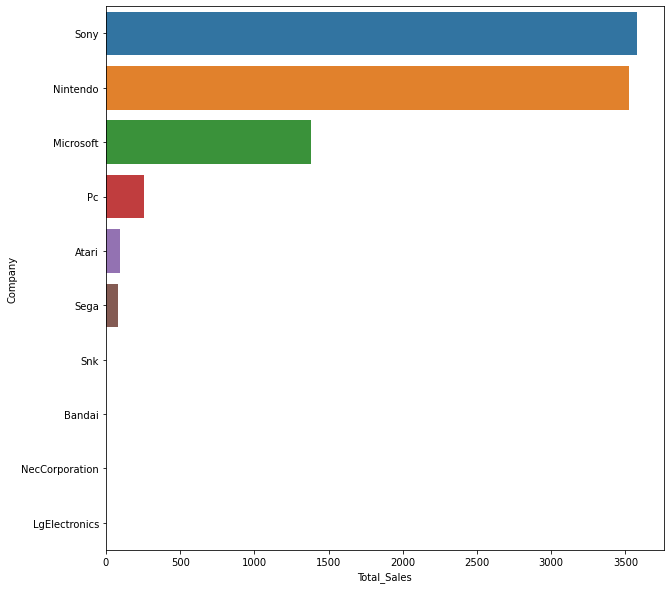

In [16]:
# making a table with values of global sales using in columns the category company and index with genre
total_sales_company = vgs.pivot_table(index="Genre", columns= "Company", values= "Global_Sales",aggfunc="sum").sum()
# order values from higher to lower
total_sales_company = total_sales_company.sort_values(ascending= False)
# reset the index names
total_sales_company = total_sales_company.reset_index()
# adding new names in columns
total_sales_company.columns = ["Company", "Total_Sales"]
print(total_sales_company)
# graph the results using barplot with seaborn
fig = plt.figure(figsize=(10,10))
sns.barplot(data= total_sales_company, x= "Total_Sales", y="Company", order= total_sales_company["Company"])

In [17]:
# verify that result are the same as DataFrame in (vgs)
sony = vgs[vgs["Company"] == "Sony"].Global_Sales.sum()
sony

3580.4500000000003

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64


Text(0.5, 1.0, 'Most genre sold')

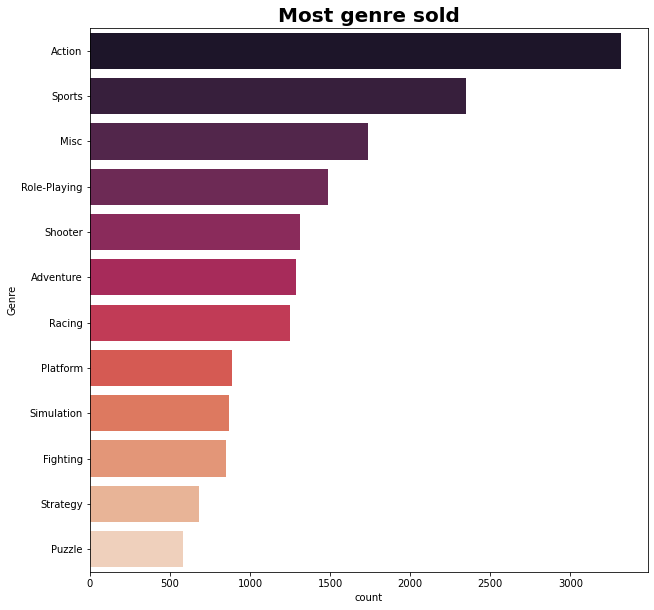

In [18]:
# verify top 5 best genre sellers
genero = vgs["Genre"].value_counts()
print(genero)
fig = plt.figure(figsize=(10,10))
sns.countplot(data=vgs, y= "Genre", palette= "rocket", order= genero.index)
plt.title("Most genre sold", weight= "black", fontsize= 20)


In [19]:
# review about the low sells of microsoft 
vgs[vgs["Company"]== "Microsoft"]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Company
15,16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82,Microsoft
23,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,Microsoft
29,30,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76,Microsoft
31,32,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64,Microsoft
35,36,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.73,Microsoft
...,...,...,...,...,...,...,...,...,...,...,...,...
16533,16536,Metal Gear Solid HD Edition,X360,2011,Action,Konami Digital Entertainment,0.00,0.00,0.01,0.00,0.01,Microsoft
16553,16556,Bound By Flame,X360,2014,Role-Playing,Unknown,0.00,0.01,0.00,0.00,0.01,Microsoft
16562,16565,Mighty No. 9,XOne,2016,Platform,Deep Silver,0.01,0.00,0.00,0.00,0.01,Microsoft
16569,16572,Resident Evil 4 HD,XOne,2016,Shooter,Capcom,0.01,0.00,0.00,0.00,0.01,Microsoft


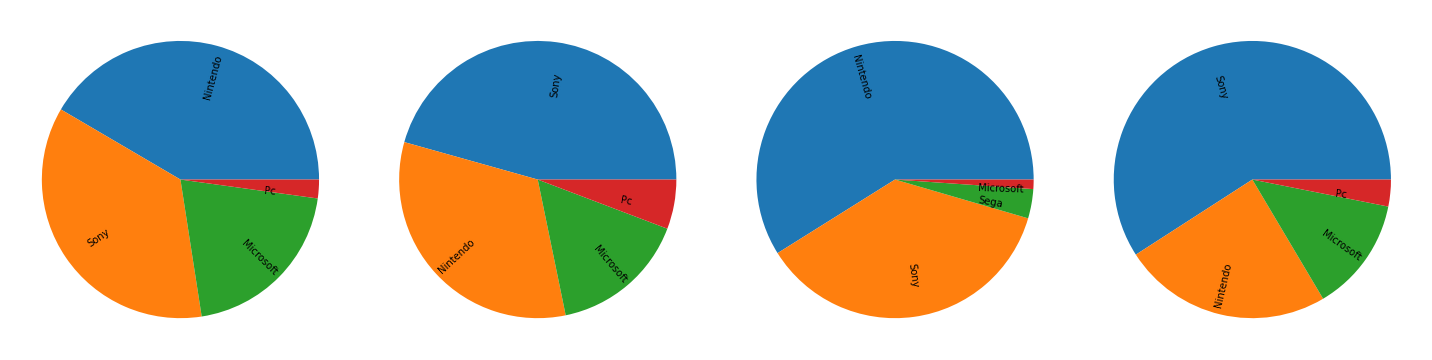

In [20]:
# creating code to show in pie graphs the sales per region in the companys on my own
r0 = vgs.pivot_table(index= "Genre", columns= "Company", values= "NA_Sales", aggfunc= "sum").sum().sort_values(ascending= False)[:4]
r1 = vgs.pivot_table(index= "Genre", columns= "Company", values= "EU_Sales", aggfunc= "sum").sum().sort_values(ascending= False)[:4]
r2 = vgs.pivot_table(index= "Genre", columns= "Company", values= "JP_Sales", aggfunc= "sum").sum().sort_values(ascending= False)[:4]
r3 = vgs.pivot_table(index= "Genre", columns= "Company", values= "Other_Sales", aggfunc= "sum").sum().sort_values(ascending= False)[:4]
fig, axes = plt.subplots(nrows= 1, ncols= 4, figsize=(20,20))
color = []
axes[0].pie(r0, labels= r0.index, rotatelabels=True, labeldistance=0.6)
axes[1].pie(r1, labels= r1.index, rotatelabels=True, labeldistance=0.6)
axes[2].pie(r2, labels= r2.index, rotatelabels=True, labeldistance=0.6)
axes[3].pie(r3, labels= r3.index, rotatelabels=True, labeldistance=0.6)
fig.tight_layout()
plt.show()

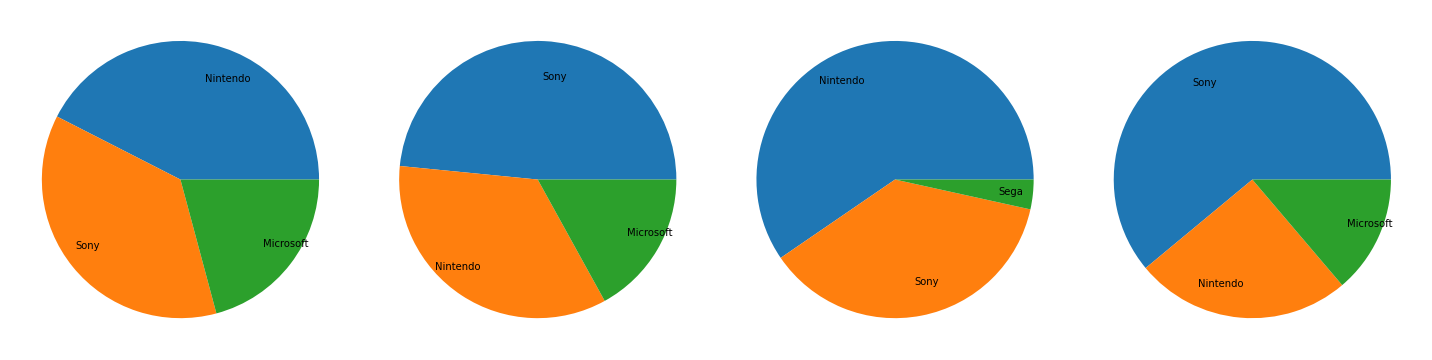

In [21]:
# example developed in chat GPT
regions = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 20))

for i, region in enumerate(regions):
    data = vgs.pivot_table(index="Genre", columns="Company", values=region, aggfunc="sum").sum().sort_values(ascending=False)[:3]
    axes[i].pie(data, labels=data.index, rotatelabels=False, labeldistance=0.75)
# autopct = autoporcentage
# wedgeprops= to generate donut chart
fig.tight_layout()
plt.show()

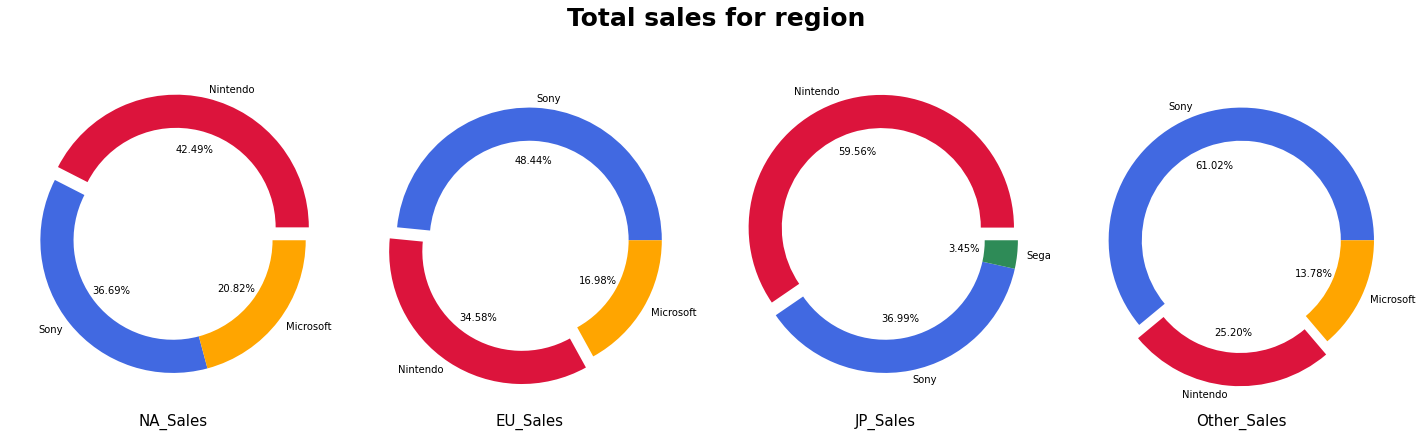

In [22]:
# # modificandolo para explotar la pestaña más alta del chart
# example developed in chat GPT
regions = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 20))

for i, region in enumerate(regions):
    data = vgs.pivot_table(index="Genre", columns="Company", values=region, aggfunc="sum").sum().sort_values(ascending=False)[:3]
    explo = [0.1 if x== "Nintendo" else 0 for x in data.index]  # codigo para generar valor de EXPLODE
    color = [("#dc143c" if x== "Nintendo" else "#4169e1" if x== "Sony" else "orange" if x== "Microsoft" else "#2e8b57") for x in data.index] # codigo para generar valor de COLORS
    axes[i].pie(data, labels=data.index, explode= explo, rotatelabels=False, labeldistance=1.07, wedgeprops= dict(width=0.25), autopct= "%1.2f%%", colors = color) # 
    axes[i].set_xlabel(region, fontsize=15, color="black")
# set title: se usara con la iteración separada de regions usando ((region) en el inificio de for...)
# autopct = autoporcentage
fig.suptitle("Total sales for region", y= 0.65, fontsize= 25, fontweight= "semibold")
fig.tight_layout()
plt.show()


# representación de encontrar el valor de Nintendo == 1
# data = vgs.pivot_table(index="Genre", columns="Company", values=region, aggfunc="sum").sum().sort_values(ascending=False)[:3]
# data
# display(data.index)
# explo = [0.1 if x== "Nintendo" else 0 for x in data.index]
# explo

In [23]:
# this is an example of enumerate function (gives 2 values (n.list: object))
lista = ["Gibran", "Carlos", "Rober"]
for num,nombre in enumerate(lista):
  print(num,nombre)

0 Gibran
1 Carlos
2 Rober


In [24]:
# correlation between genre and company in games using vgs as dataframe
correlation = vgs[["Company", "Genre"]].corr()
# when select more than one column we need to use double square brackets
correlation
vgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Rank          16598 non-null  int32   
 1   Name          16598 non-null  object  
 2   Platform      16598 non-null  category
 3   Year          16598 non-null  int32   
 4   Genre         16598 non-null  category
 5   Publisher     16598 non-null  object  
 6   NA_Sales      16598 non-null  float64 
 7   EU_Sales      16598 non-null  float64 
 8   JP_Sales      16598 non-null  float64 
 9   Other_Sales   16598 non-null  float64 
 10  Global_Sales  16598 non-null  float64 
 11  Company       16598 non-null  category
dtypes: category(3), float64(5), int32(2), object(2)
memory usage: 1.1+ MB


/tmp/ipykernel_25442/2266770316.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = vgs[["Company", "Genre"]].corr()


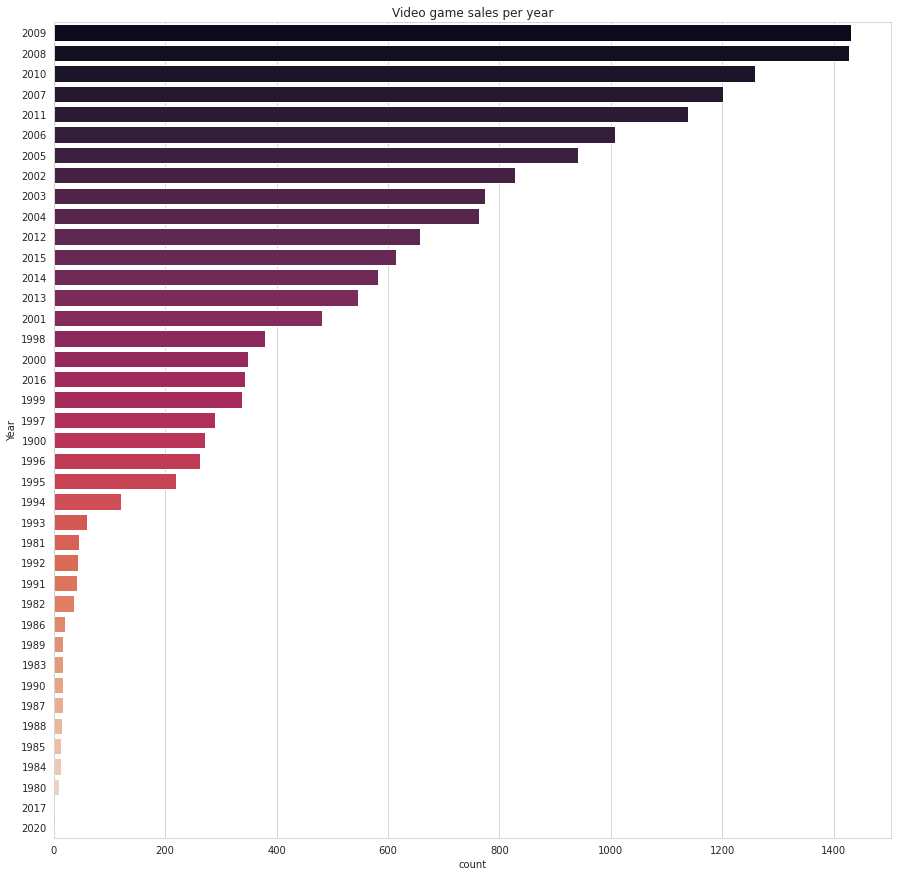

In [25]:
plt.figure(figsize=(15,15))
sns.set_style(style="whitegrid")
plt.title("Video game sales per year")
sns.countplot(data= vgs, y= "Year", order= vgs["Year"].value_counts().index, palette="rocket");

investigar como cambiar de color un valor en seaborn o matplotlib

In [26]:
dos_9 = vgs[vgs["Year"] == 2009][:5]
dos_8 = vgs[vgs["Year"] == 2008][:5]
dos_10 = vgs[vgs["Year"] == 2010][:5]
dos_7 = vgs[vgs["Year"] == 2007][:5]
display(dos_8)
display(dos_10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Company
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo
39,40,Super Smash Bros. Brawl,Wii,2008,Fighting,Nintendo,6.75,2.61,2.66,1.02,13.04,Nintendo
51,52,Grand Theft Auto IV,X360,2008,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02,Microsoft
56,57,Grand Theft Auto IV,PS3,2008,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57,Sony
88,89,Pokémon Platinum Version,DS,2008,Role-Playing,Nintendo,2.82,1.78,2.69,0.55,7.84,Nintendo


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Company
15,16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82,Microsoft
26,27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32,Nintendo
31,32,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64,Microsoft
40,41,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73,Sony
54,55,Gran Turismo 5,PS3,2010,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12,10.77,Sony


/tmp/ipykernel_25442/1231906718.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= dos_8, ci= None, x= "Global_Sales", y= "Name",ax=axes[0,1], order= dos_8["Name"], palette=cols)
/tmp/ipykernel_25442/1231906718.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= dos_10, ci= None, x= "Global_Sales", y= "Name",ax=axes[1,0], order= dos_10["Name"], palette= cols)


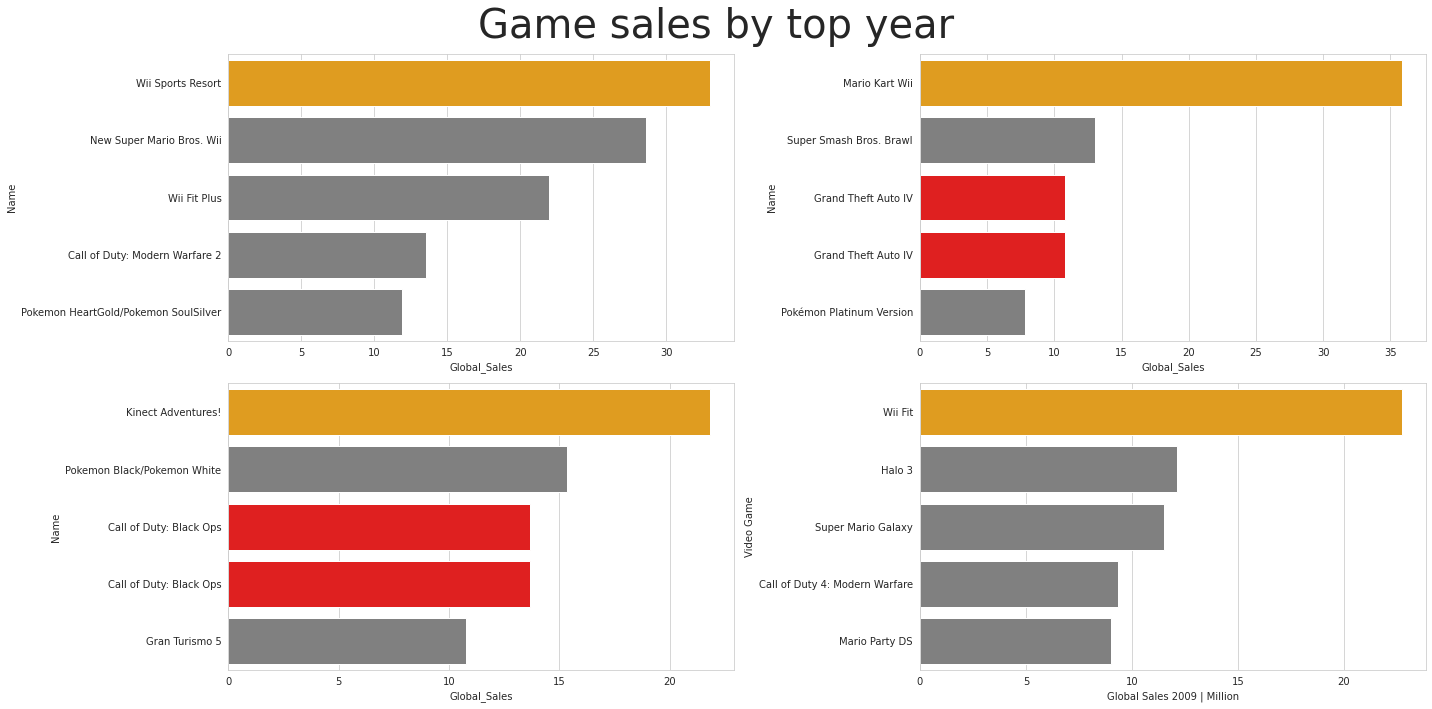

In [28]:
sns.set_style(style="whitegrid")
fig, axes = plt.subplots(2,2,figsize= (20,10))
# para configurar una paleta de colores especifica se señala la cantidad de barras con los colores
cols = ["orange", "gray", "red", "red", "gray"]
cols1 = ["orange", "gray", "gray", "gray", "gray"]
sns.barplot(data= dos_9, x= "Global_Sales", y= "Name",ax=axes[0,0], palette= cols1)
sns.barplot(data= dos_8, ci= None, x= "Global_Sales", y= "Name",ax=axes[0,1], order= dos_8["Name"], palette=cols)
sns.barplot(data= dos_10, ci= None, x= "Global_Sales", y= "Name",ax=axes[1,0], order= dos_10["Name"], palette= cols)
sns.barplot(data= dos_7, x= "Global_Sales", y= "Name",ax=axes[1,1], palette= cols1)
plt.suptitle("Game sales by top year", fontsize= 40)
plt.xlabel("Global Sales 2009 | Million")
plt.ylabel("Video Game")
plt.tight_layout();

* top 5 del juego mas publicado en plataformas ()

<AxesSubplot:>

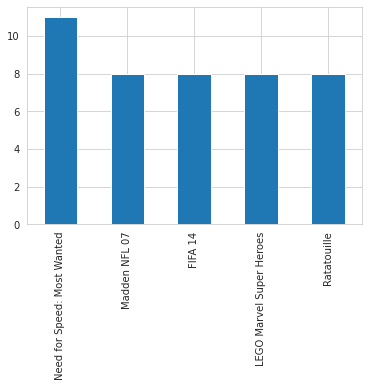

In [ ]:
duplicated = vgs[vgs["Name"].duplicated()]
counter = duplicated["Name"].value_counts()
counter = counter[:5]
counter.plot(kind= "bar")

encontrar la cantidad de global_sales por nombres duplicados

In [ ]:
vgs

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Company
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,Nintendo
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,Nintendo
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,Sony
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,Nintendo


# VIDEO GAMES DISTRIBUTION
### PROBABILITY MASS FUNCTION (PMFs)

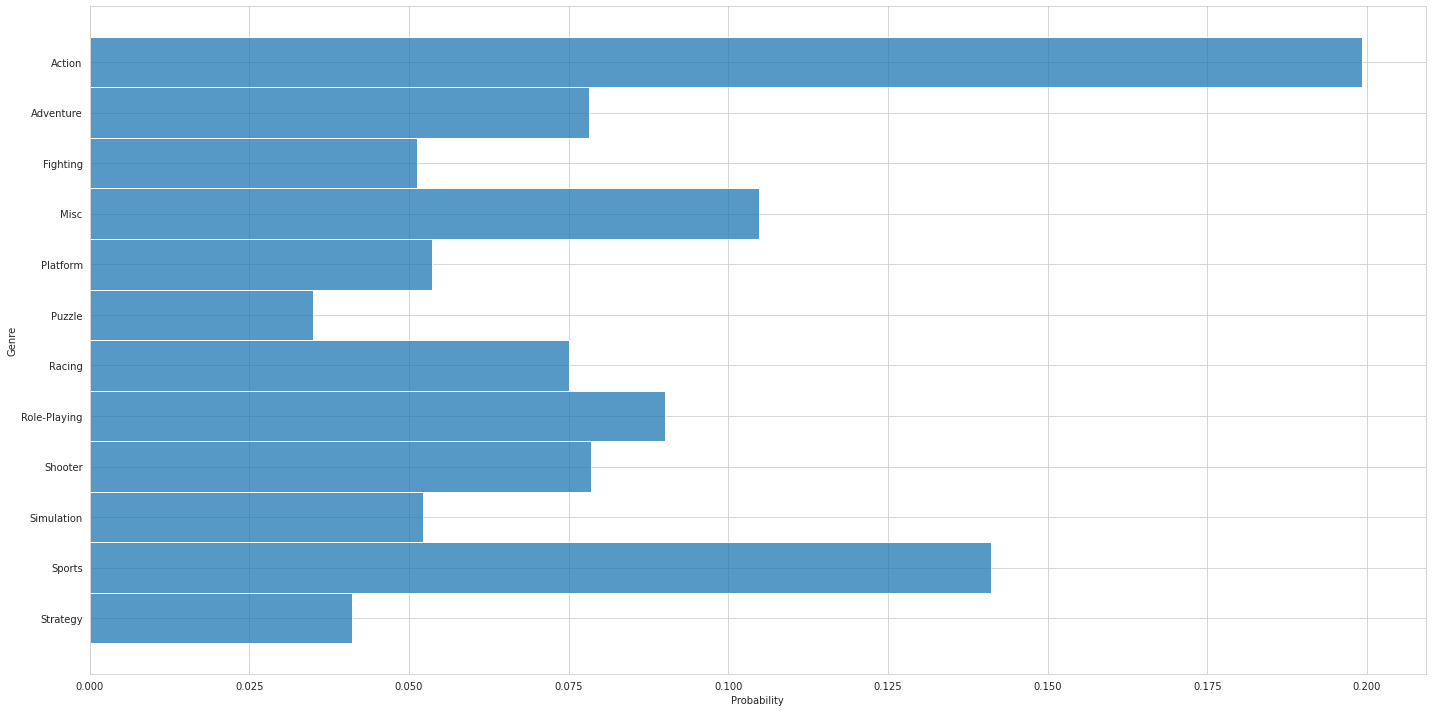

In [ ]:
plt.figure(figsize= (20,10))                              # por que el rober dijo.... prro

years_without_null = vgs[vgs["Year"] != 1900]

sns.histplot(
  data= years_without_null,
  y= "Genre",
  stat= "probability",
  binwidth= 1
)
plt.tight_layout();

<AxesSubplot:>

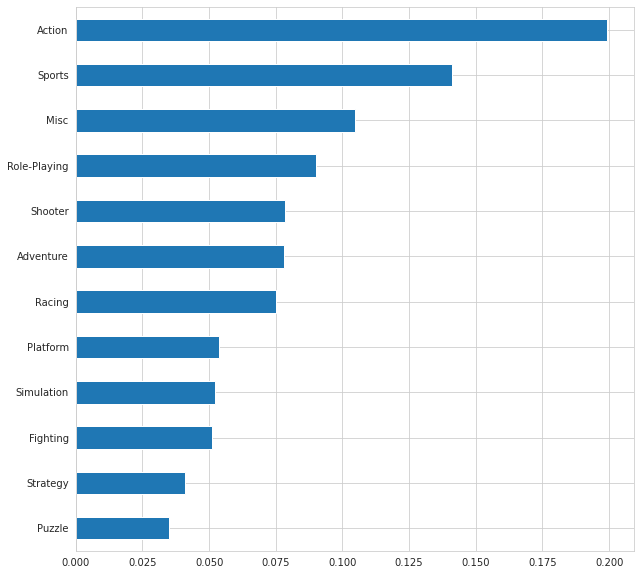

In [ ]:
# antes de comenzar se utiliza empiricaldist.Pmf == que es un Panda Series que representa las funciones de probabilidad de masas
# .from_seq(data, normalize) == función para agregar valores o variable.
pmf_genre_vgs = empiricaldist.Pmf.from_seq(
  years_without_null.Genre,
  normalize= True # si usas normalize en True te arroja la probabilidad de 0 a 1
)
pmf_genre_vgs = pmf_genre_vgs.sort_values(ascending=True)
pmf_genre_vgs.plot(kind= "barh", figsize=(10,10))

<AxesSubplot:>

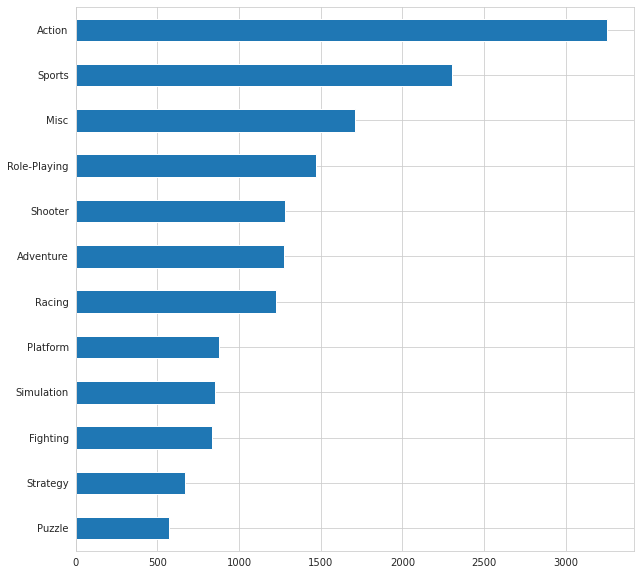

In [ ]:
pmf_genre_vgs = empiricaldist.Pmf.from_seq(
  years_without_null.Genre,
  normalize= False # si usas normalize en False permite ver el conteo de videojuegos por genero.
)
pmf_genre_vgs = pmf_genre_vgs.sort_values(ascending=True)
pmf_genre_vgs.plot(kind= "barh", figsize=(10,10))

### FUNCIONES EMPIRICAS DE PROBABILIDAD ACOMULADA (CDFs) COMULATIVE DISTRIBUTION FUNCTION

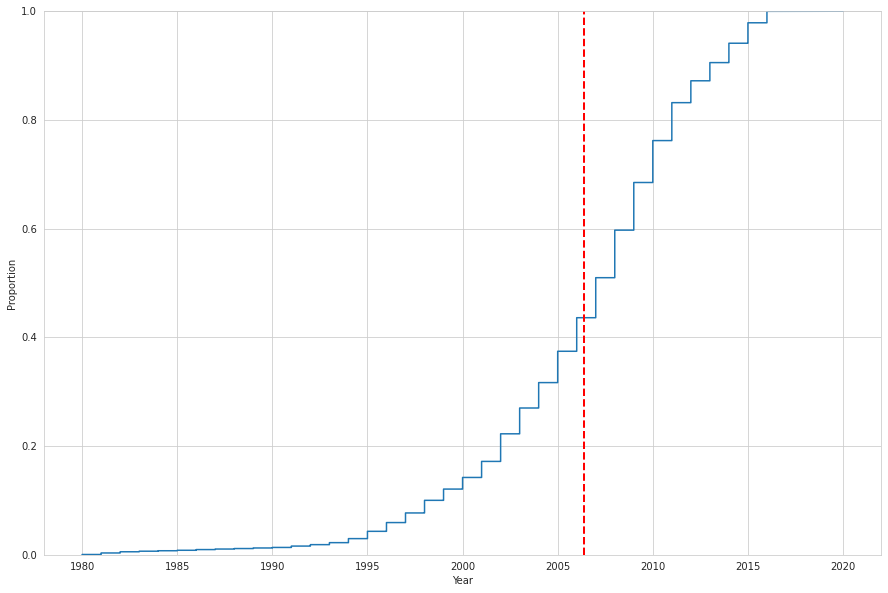

In [ ]:
plt.figure(figsize=(15,10))
sns.ecdfplot(
  data= years_without_null,
  x= "Year"
)

plt.axvline(
  x= years_without_null.Year.mean(),
  color= "red",
  linestyle= "dashed",
  linewidth= 2
  );

### FUNCIONES DE PROBABILIDAD DE DENSIDAD (PDFs) PROBABILITY OF DENSITY FUNCTION

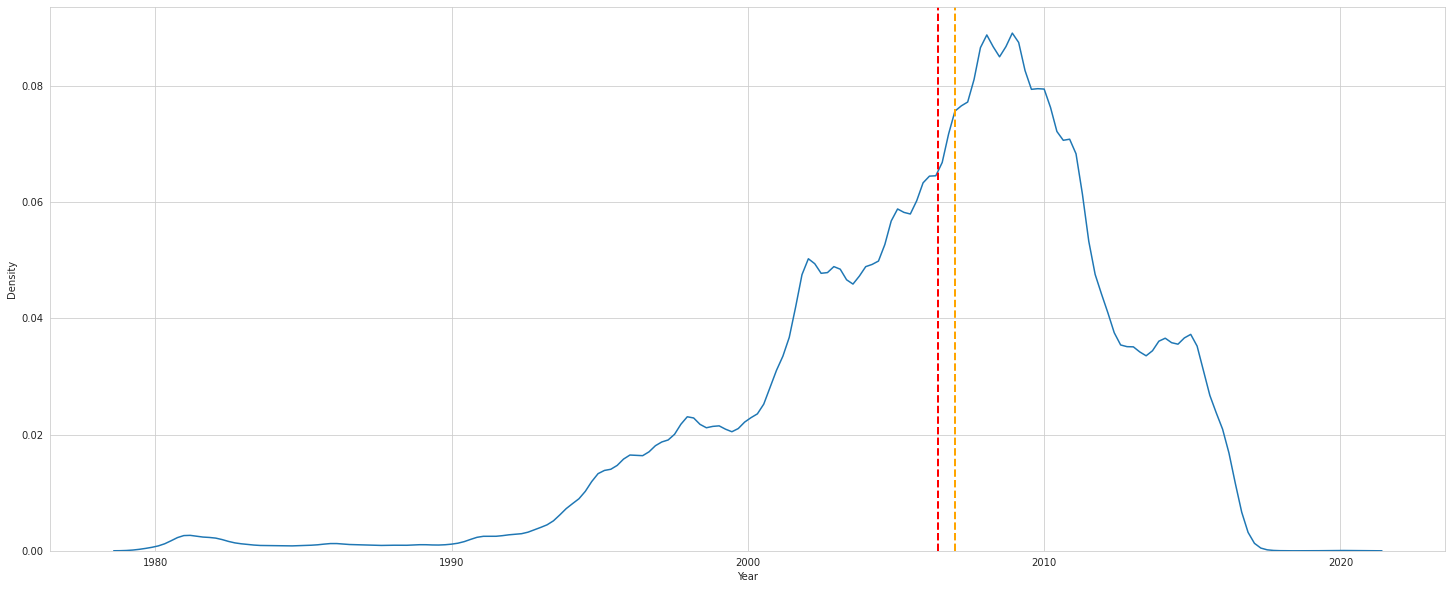

In [ ]:
years_without_null = vgs[vgs["Year"] != 1900]

plt.figure(figsize=(25,10))
sns.kdeplot(
  data= years_without_null,
  x= "Year",
  bw_method= 0.08                                     # ancho de banda
)

plt.axvline(
  x= years_without_null.Year.mean(),
  color= "red",
  linestyle= "dashed",
  linewidth= 2
  )

plt.axvline(
  x= years_without_null.Year.median(),
  color= "orange",
  linestyle= "dashed",
  linewidth= 2
  )

In [ ]:
stats= years_without_null.Year.describe(include= all)
stats

count    16327.000000
mean      2006.406443
std          5.828981
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [ ]:
xs= np.linspace(stats["min"], stats["max"])
xs

array([1980.        , 1980.81632653, 1981.63265306, 1982.44897959,
       1983.26530612, 1984.08163265, 1984.89795918, 1985.71428571,
       1986.53061224, 1987.34693878, 1988.16326531, 1988.97959184,
       1989.79591837, 1990.6122449 , 1991.42857143, 1992.24489796,
       1993.06122449, 1993.87755102, 1994.69387755, 1995.51020408,
       1996.32653061, 1997.14285714, 1997.95918367, 1998.7755102 ,
       1999.59183673, 2000.40816327, 2001.2244898 , 2002.04081633,
       2002.85714286, 2003.67346939, 2004.48979592, 2005.30612245,
       2006.12244898, 2006.93877551, 2007.75510204, 2008.57142857,
       2009.3877551 , 2010.20408163, 2011.02040816, 2011.83673469,
       2012.65306122, 2013.46938776, 2014.28571429, 2015.10204082,
       2015.91836735, 2016.73469388, 2017.55102041, 2018.36734694,
       2019.18367347, 2020.        ])

In [ ]:
ys= scipy.stats.norm(stats["mean"], stats["std"]).cdf(xs)
ys

array([2.94641038e-06, 5.66355630e-06, 1.06834471e-05, 1.97777927e-05,
       3.59341899e-05, 6.40799834e-05, 1.12161526e-04, 1.92706644e-04,
       3.25017658e-04, 5.38149694e-04, 8.74814286e-04, 1.39629967e-03,
       2.18840481e-03, 3.36823509e-03, 5.09150084e-03, 7.55970460e-03,
       1.10263211e-02, 1.58008073e-02, 2.22490821e-02, 3.07890551e-02,
       4.18799231e-02, 5.60043441e-02, 7.36432586e-02, 9.52440245e-02,
       1.21183581e-01, 1.51729419e-01, 1.87002033e-01, 2.26943072e-01,
       2.71293437e-01, 3.19584987e-01, 3.71148348e-01, 4.25137612e-01,
       4.80570783e-01, 5.36382857e-01, 5.91486806e-01, 6.44836682e-01,
       6.95486772e-01, 7.42641273e-01, 7.85690188e-01, 8.24228916e-01,
       8.58060993e-01, 8.87185330e-01, 9.11770859e-01, 9.32122487e-01,
       9.48642670e-01, 9.61792696e-01, 9.72057119e-01, 9.79913788e-01,
       9.85810888e-01, 9.90151336e-01])

<AxesSubplot:>

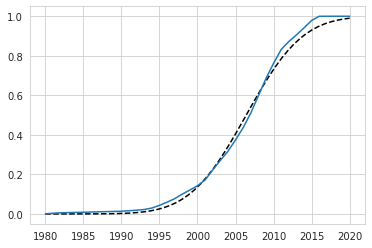

In [ ]:
plt.plot(xs, ys, color= "black", linestyle= "dashed")
empiricaldist.Cdf.from_seq(
  years_without_null.Year,
  normalize= True
).plot()